# Secondary dataset

I found this small dataset in Kaggle after searching for a while. GDP by states wasn't exactly what I am looking for, neither GDP by cities. Worth to mention that, this dataset have crime rate and school rate by zip code, the features which affect the price most.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnavgupta1205/usa-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Администратор\.cache\kagglehub\datasets\arnavgupta1205\usa-housing-dataset\versions\1


In [20]:
import pandas as pd 
data = pd.read_csv('additional.csv')
print(data.head())

    Price  Bedrooms  Bathrooms  SquareFeet  YearBuilt  GarageSpaces  LotSize  \
0  221958         1        1.9        4827       1979             2     1.45   
1  771155         2        2.0        1035       1987             2     1.75   
2  231932         1        3.0        2769       1982             1     1.46   
3  465838         3        3.3        2708       1907             3     1.62   
4  359178         4        3.4        1175       1994             2     0.74   

   ZipCode  CrimeRate  SchoolRating  
0    82240      48.60             5  
1    74315      92.03             9  
2    79249      52.08             3  
3    80587      61.65             1  
4    20756      15.66             4  


In [21]:
data.drop(columns=['Price', 'Bedrooms', 'Bathrooms', 'SquareFeet', 'YearBuilt', "GarageSpaces", 'LotSize' ], inplace=True)
data.to_csv('secondary.csv', index=False)

In [25]:
data.head()

,zip_code,CrimeRate,SchoolRating
0,82240,48.60,5
1,74315,92.03,9
2,79249,52.08,3
3,80587,61.65,1
4,20756,15.66,4


In [23]:
data.shape

(300, 3)

In [24]:
data = data.rename(columns={'ZipCode': 'zip_code'})

I am planning to merge the two data set, taking the ZipCode as a Primary Key. 

In [18]:
data.head()

0    82240
1    74315
2    79249
3    80587
4    20756
Name: zip_code, dtype: int64

In [73]:
data.describe()

,zip_code,CrimeRate,SchoolRating
count,300.000000,300.000000,300.000000
mean,54324.770000,49.324033,5.096667
std,24718.938552,28.833220,2.674165
min,10163.000000,0.190000,1.000000
25%,34175.000000,22.547500,3.000000
50%,54896.500000,49.970000,5.000000
75%,74108.000000,74.402500,8.000000
max,99881.000000,99.710000,9.000000


In [26]:
main_data = pd.read_csv('train_set.csv')
merged_data = pd.merge(main_data, data, on='zip_code', how='inner')

In [74]:
merged_data.shape

(4862, 14)

In [ ]:
merged_data.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
# merged_data.groupby('state', 'city')['SchoolRating'].mean().reset_index()
top_cities = merged_data.groupby(['state', 'city'])['SchoolRating'].mean().reset_index()
top_cities = top_cities.sort_values(by='SchoolRating', ascending=False)
top_cities.head(10)
# top_cities['SchoolRating'].count()

,state,city,SchoolRating
17,Florida,Dania Beach,9.0
75,Mississippi,DeKalb,9.0
121,Texas,Charlotte,9.0
125,Texas,Jourdanton,9.0
127,Texas,Quanah,9.0
128,Utah,East Carbon,9.0
112,Pennsylvania,Ringtown,9.0
81,Missouri,New Florence,9.0
133,Washington,Hansville,9.0
20,Florida,Hollywood,9.0


<Axes: xlabel='CrimeRate', ylabel='Count'>

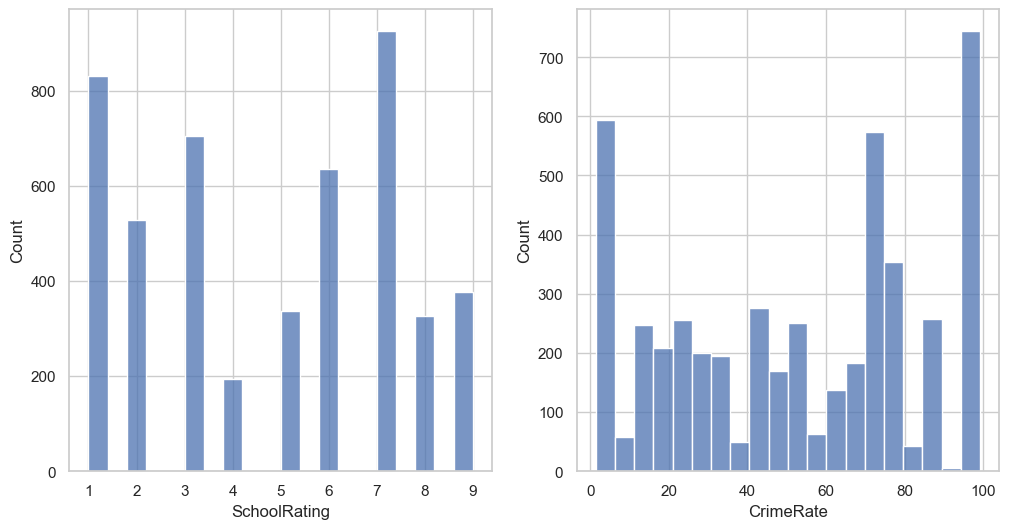

In [78]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
sns.histplot(merged_data['SchoolRating'], ax= ax[0], bins=20)
sns.histplot(merged_data['CrimeRate'], ax= ax[1], bins=20)

In [81]:
import plotly.express as px

In [87]:
crime_ranges = pd.cut(data['CrimeRate'], bins=[0, 25, 50, 75, 100], 
                             labels=['Low (0-25)', 'Medium (25-50)', 'High (50-75)', 'Very High (75-100)'])
crime_range_counts = crime_ranges.value_counts()
        
fig7 = px.pie(values=crime_range_counts.values, names=crime_range_counts.index,
                     title="Crime Rate Categories",
                     color_discrete_sequence=px.colors.sequential.RdBu_r,
                     hole=0.4)
fig7.show()

<Axes: >

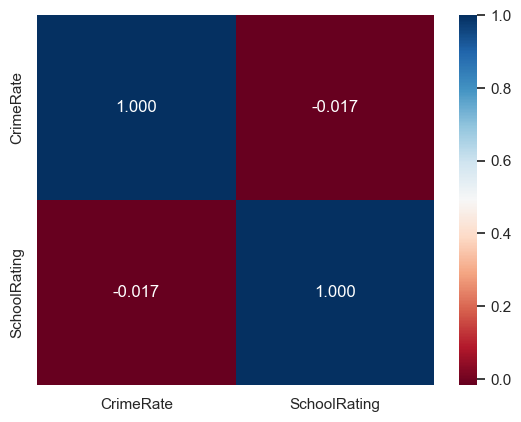

In [ ]:
corr = data[['CrimeRate', 'SchoolRating']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.3f')

In [94]:
fig5 = px.scatter(data, x='CrimeRate', y='SchoolRating',
                         title="Relationship between Crime Rate and School Rating",
                         labels={'CrimeRate': 'Crime Rate', 'SchoolRating': 'School Rating'},
                         opacity=0.6,
                         color='SchoolRating',
                         color_continuous_scale='RdYlGn',
                         trendline="ols")
fig5.show()